In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
SCALE = 100

In [4]:
# muestra = np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.6642706394195557, 0.6909681558609009, 0.7022516131401062, 0.737226128578186, 0.7703730463981628, 0.7987203001976013, 0.8341658115386963, 0.8711322546005249, 0.9123274087905884, 0.9551922082901001, 1.005927562713623, 1.0623688697814941, 1.1364308595657349, 1.204483985900879, 1.2830501794815063, 1.3850029706954956, 1.501875877380371, 1.646504282951355, 1.8163589239120483, 1.844528317451477, 1.8474305868148804, 1.836538553237915, 1.8279281854629517, 1.831113576889038, 1.8240721225738525, 1.819859266281128, 1.8189938068389893, 1.8190789222717285, 1.818361759185791, 1.8196156024932861, 1.8185538053512573, 1.8165448904037476, 1.8226972818374634, 1.8214441537857056, 1.827208399772644, 1.8353554010391235, 1.8358242511749268, 1.8450202941894531, 1.8452166318893433, 1.8434115648269653, 1.792276382446289, 1.6524322032928467, 1.5343565940856934, 1.4524531364440918, 1.3557887077331543, 1.281888484954834, 1.2138258218765259, 1.1513231992721558, 1.0940978527069092, 1.0283775329589844, 0.9830803871154785, 0.9420552253723145, 0.9146254062652588, 0.8738597631454468, 0.8466126918792725, 0.8111129999160767, 0.7936536073684692, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0])
muestra = np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0588769912719727, 2.067847490310669, 2.0810821056365967, 2.0722639560699463, 2.085017442703247, 2.0759425163269043, 2.0970101356506348, 2.103759527206421, 2.1017165184020996, 2.0607547760009766, 1.9316035509109497, 1.7872600555419922, 1.6924188137054443, 1.595028042793274, 1.5134679079055786, 1.4392411708831787, 1.3684388399124146, 1.3039066791534424, 1.240058183670044, 1.1893742084503174, 1.1441855430603027, 1.103561520576477, 1.0626951456069946, 1.0308936834335327, 0.990147054195404, 0.9672182202339172, 0.9428669214248657, 0.8988781571388245, 0.8847332000732422, 0.8533994555473328, 0.8343951106071472, 0.8191306591033936, 0.7958282828330994, 0.7746561169624329, 0.7546329498291016, 0.7358598709106445, 0.7313166260719299, 0.717244029045105, 0.6922416090965271, 0.6865898370742798, 0.6779175400733948, 0.6667662858963013, 0.682983934879303, 0.6927324533462524, 0.7157726883888245, 0.7262841463088989, 1.645018458366394, 1.6242518424987793, 1.5968906879425049, 1.5787944793701172, 1.5592591762542725, 1.533752679824829, 1.5145398378372192, 1.5051987171173096, 1.482158899307251, 1.4641451835632324, 1.4513270854949951, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0])
# muestra = np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.7029978036880493, 0.6869065165519714, 0.677407443523407, 0.6574749946594238, 0.6604294776916504, 0.6819919347763062, 0.70359206199646, 0.7108540534973145, 0.7222719192504883, 1.610053539276123, 1.5852051973342896, 1.5648634433746338, 1.543534278869629, 1.5304911136627197, 1.5080405473709106, 1.4935675859451294, 1.4905683994293213, 1.4727321863174438, 1.448631763458252, 1.4471898078918457, 1.4317058324813843, 1.4142334461212158, 1.400834560394287, 1.4012417793273926, 1.3830257654190063, 1.3720741271972656, 1.3595738410949707, 1.4157754182815552, 1.5007150173187256, 1.599584698677063, 1.690631628036499, 1.8269752264022827, 1.9488954544067383, 2.1021955013275146, 2.1293983459472656, 2.1154704093933105, 2.1205523014068604, 2.108930826187134, 2.107121706008911, 2.1007614135742188, 2.091419219970703, 2.0883023738861084, 2.0923068523406982, 2.090745210647583, 2.088430166244507, 2.0941433906555176, 2.0920908451080322, 2.102950096130371, 2.0921578407287598, 2.091684579849243, 2.0981671810150146, 2.098921537399292, 2.0615487098693848, 1.74592125415802, 1.5649511814117432, 1.4139457941055298, 1.2811024188995361, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0])
# muestra = np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.6378073692321777, 0.6818955540657043, 0.7308616638183594, 0.7750599384307861, 0.8294334411621094, 0.9022689461708069, 0.980961263179779, 1.0716466903686523, 1.1735641956329346, 1.3233004808425903, 1.503596544265747, 1.717141032218933, 2.020695686340332, 2.094397783279419, 2.102062463760376, 2.0917577743530273, 2.0990805625915527, 2.080948829650879, 2.088789939880371, 2.0919008255004883, 2.0925333499908447, 2.0989558696746826, 2.093632459640503, 2.0924723148345947, 2.098372459411621, 2.107177972793579, 2.114622116088867, 2.118983745574951, 2.1286163330078125, 2.129514455795288, 2.1475985050201416, 2.153189182281494, 2.1567938327789307, 2.168217182159424, 2.1752119064331055, 2.198370933532715, 2.2073445320129395, 1.465495228767395, 1.4090105295181274, 1.396352767944336, 1.3941819667816162, 1.409759283065796, 1.4217145442962646, 1.4352514743804932, 1.4451700448989868, 1.4543063640594482, 1.4691002368927002, 1.493062138557434, 1.497839331626892, 1.518635869026184, 1.5279539823532104, 1.5488436222076416, 1.5740283727645874, 1.5833345651626587, 1.6110472679138184, 1.6384596824645996, 1.6595240831375122, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0])
# muestra = np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.6841973066329956, 0.7062568664550781, 0.7333126664161682, 0.7633499503135681, 0.783264696598053, 0.8246030807495117, 0.8521220684051514, 0.8909705281257629, 0.9366981983184814, 0.9979653358459473, 1.0347501039505005, 1.043818712234497, 1.038960576057434, 1.033639907836914, 1.0303006172180176, 1.0180104970932007, 1.0157856941223145, 1.018729329109192, 1.020210862159729, 1.0055747032165527, 1.0034866333007812, 1.0063663721084595, 1.0008553266525269, 1.0003565549850464, 1.0002094507217407, 0.9980190992355347, 1.001721739768982, 1.0009989738464355, 0.9935962557792664, 1.0000580549240112, 1.0011074542999268, 1.0056363344192505, 1.0073598623275757, 1.003435730934143, 1.0152685642242432, 1.0068259239196777, 0.9995904564857483, 1.0244545936584473, 1.01866614818573, 1.0226266384124756, 1.0268337726593018, 1.0305293798446655, 1.0305317640304565, 1.0369794368743896, 1.037396788597107, 1.0552107095718384, 1.067512035369873, 1.0498147010803223, 1.0519628524780273, 1.02263605594635, 0.9671339988708496, 0.9317141175270081, 0.8950638771057129, 0.8611639738082886, 0.8334668874740601, 0.8042133450508118, 0.7649267911911011, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0])

In [11]:
SCALE = 100

RANGO_ANGULAR = np.arange(-np.pi/2, np.pi/2, 0.01745329238474369)
PARTICLES = 100000
UMBRAL = 3

In [6]:
REAL_MAP = cv2.imread("./maps/mapa.pgm", cv2.IMREAD_GRAYSCALE)

DARK_MAP = REAL_MAP.copy()
DARK_MAP[DARK_MAP == 205] = 255
DARK_MAP = np.logical_not(DARK_MAP).astype(np.uint8)

In [7]:
def get_particles(N:int, points:list=None, r:int=10):
    angles = np.linspace(-np.pi, np.pi, 3600)

    if points:
        options = np.zeros(REAL_MAP.shape, dtype=np.uint8)
        for point in points: options[int(point[0])-r:int(point[0])+r, int(point[1])-r:int(point[1])+r] = 1
        spaces = np.column_stack(np.where(options * REAL_MAP == 255))

        return np.column_stack([
                spaces[np.random.randint(spaces.shape[0] , size=N), :],
                np.random.choice(angles, size=N),
            ])
    else:
        spaces = np.column_stack(np.where(REAL_MAP == 255))
        return np.column_stack([
                spaces[np.random.randint(spaces.shape[0] , size=N), :],
                np.random.choice(angles, size=N),
            ])

In [8]:
def get_more_correct_particles(particles:list, muestra:list, tolerance:int=1):
    sobrevivientes = []

    # out = DARK_MAP.copy()

    for y, x, a in particles:
        N = 0
        for n in range(62, 119):
            y_a = int(y - SCALE*muestra[n]*np.sin(RANGO_ANGULAR[n] + a))
            x_a = int(x + SCALE*muestra[n]*np.cos(RANGO_ANGULAR[n] + a))
            if 0 < y_a < DARK_MAP.shape[0] and 0 < x_a < DARK_MAP.shape[1]:
                if np.sum(DARK_MAP[y_a-tolerance:y_a+tolerance+1, x_a-tolerance:x_a+tolerance+1]) == 0:
                    N += 1
                    if N > UMBRAL:
                        break
            else:
                N = 70
                break
        if N < UMBRAL:
            # print(y, x, a, N)
            sobrevivientes.append([y, x])
            # out[int(y), int(x)] = 3
            # for n in range(62, 119):
            #     x_a = int(x + SCALE*muestra[n]*np.cos(RANGO_ANGULAR[n] + a))
            #     y_a = int(y - SCALE*muestra[n]*np.sin(RANGO_ANGULAR[n] + a))
                # out[y_a, x_a] = 2
    return sobrevivientes


216.0 53.0 0.5246171672151889 2
221.0 46.0 0.5246171672151889 0
220.0 49.0 0.5403294950186388 1
217.0 42.0 0.5106506536121223 2
227.0 52.0 0.5647708938240052 0
225.0 43.0 0.563025079623622 1
228.0 53.0 0.6031788062324384 0
221.0 42.0 0.5333462382171055 2


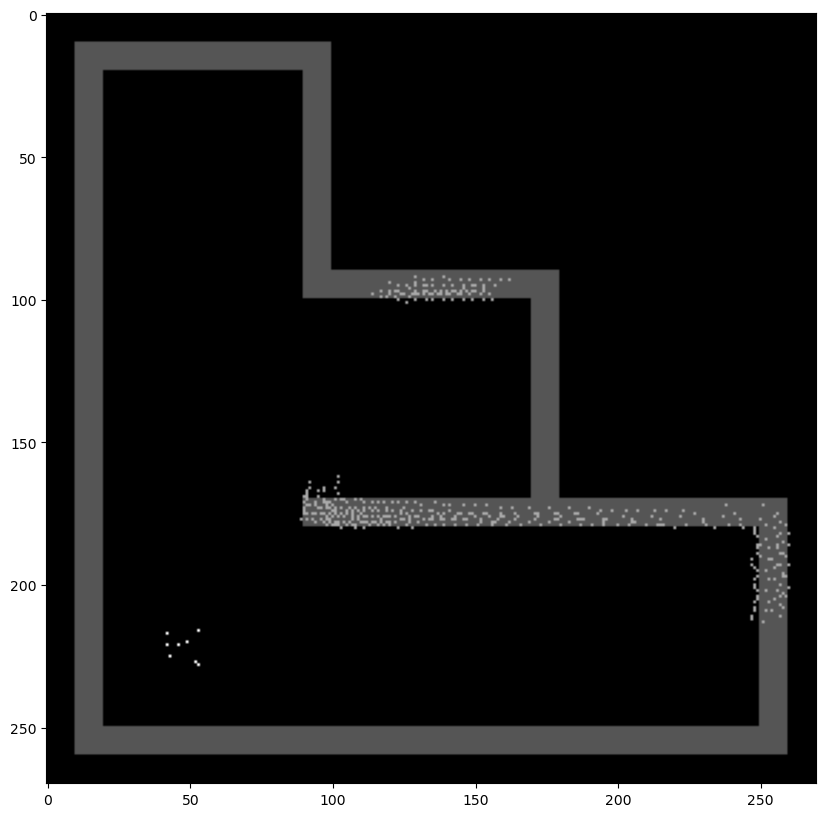

In [17]:
particles = get_particles(PARTICLES)

sobrevivientes = []

out = DARK_MAP.copy()

for y, x, a in particles:
    N = 0
    for n in range(62, 119, 2):
        x_a = int(x + SCALE*muestra[n]*np.cos(RANGO_ANGULAR[n] + a))
        y_a = int(y - SCALE*muestra[n]*np.sin(RANGO_ANGULAR[n] + a))
        if 0 < y_a < DARK_MAP.shape[0] and 0 < x_a < DARK_MAP.shape[1]:
            if np.sum(DARK_MAP[y_a-1:y_a+2, x_a-1:x_a+2]) == 0:
                N += 1
                if N > UMBRAL:
                    break
        else:
            N = 70
            break
    if N < UMBRAL:
        print(y, x, a, N)
        sobrevivientes.append([y, x])
        out[int(y), int(x)] = 3
        for n in range(62, 119):
            x_a = int(x + SCALE*muestra[n]*np.cos(RANGO_ANGULAR[n] + a))
            y_a = int(y - SCALE*muestra[n]*np.sin(RANGO_ANGULAR[n] + a))
            out[y_a, x_a] = 2


plt.imshow(out, cmap='gray')

223.0 53.0 0.5822290358278388 2
229.0 50.0 0.6101620630339717 1
226.0 47.0 0.583974850028222 1
229.0 49.0 0.6101620630339717 1
230.0 48.0 0.6293660192381885 2
221.0 48.0 0.5455669376197889 2
223.0 51.0 0.5508043802209386 1
224.0 51.0 0.5490585660205554 1
223.0 52.0 0.5700083364251554 2
224.0 48.0 0.5473127518201721 1
228.0 46.0 0.6066704346332052 1
230.0 55.0 0.6363492760397218 2
221.0 48.0 0.529854609816339 2
224.0 53.0 0.5857206642286052 2
227.0 54.0 0.6014329920320551 0
230.0 49.0 0.6276202050378052 2
221.0 48.0 0.563025079623622 2
227.0 51.0 0.5857206642286052 0
223.0 50.0 0.5804832216274551 2
226.0 54.0 0.5927039210301386 2
229.0 48.0 0.6084162488335885 1
227.0 46.0 0.5996871778316719 1
224.0 51.0 0.5769915932266887 2
222.0 52.0 0.5787374074270719 2
226.0 49.0 0.596195549430905 1
224.0 49.0 0.5734999648259218 1
226.0 51.0 0.5752457790263055 0
228.0 50.0 0.6153995056351218 0
226.0 50.0 0.5874664784289885 1
223.0 49.0 0.5769915932266887 2
223.0 46.0 0.5752457790263055 2
228.0 50.0 0

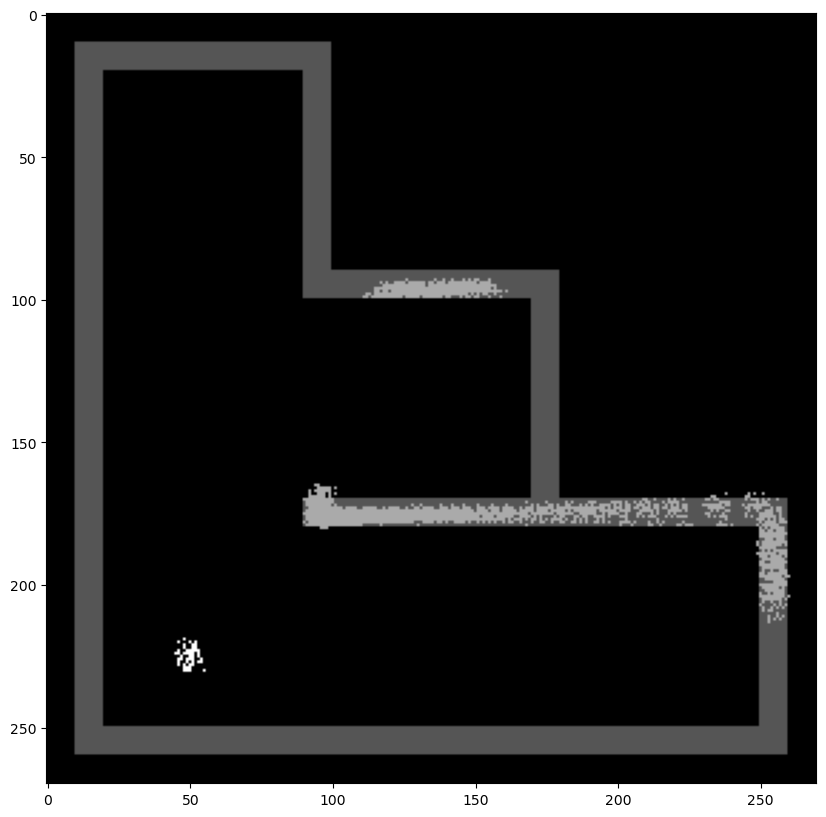

In [13]:
particles = get_particles(PARTICLES, sobrevivientes)

sobrevivientes = []

out = DARK_MAP.copy()

for y, x, a in particles:
    N = 0
    for n in range(62, 119):
        x_a = int(x + SCALE*muestra[n]*np.cos(RANGO_ANGULAR[n] + a))
        y_a = int(y - SCALE*muestra[n]*np.sin(RANGO_ANGULAR[n] + a))
        if 0 < y_a < DARK_MAP.shape[0] and 0 < x_a < DARK_MAP.shape[1]:
            if np.sum(DARK_MAP[y_a, x_a]) == 0:
                N += 1
                if N > UMBRAL:
                    break
        else:
            N = 70
            break
    if N < UMBRAL:
        print(y, x, a, N)
        sobrevivientes.append([y, x])
        out[int(y), int(x)] = 3
        for n in range(62, 119):
            x_a = int(x + SCALE*muestra[n]*np.cos(RANGO_ANGULAR[n] + a))
            y_a = int(y - SCALE*muestra[n]*np.sin(RANGO_ANGULAR[n] + a))
            out[y_a, x_a] = 2

plt.imshow(out, cmap='gray')